In [33]:
import platform
mysystem = platform.system()
# file_id = "1w5wMziz2vYqvN5y8qnhuPVtsbxTlQb21" #small data set
file_id = "1LT5aEa0wX8nttZGecn0PDZP561QxlMVW"  #large data set
file_download_link = "https://docs.google.com/uc?export=download&id=" + file_id
if mysystem != 'Windows':
    !wget -o waterdata.csv --no-check-certificate "$file_download_link"
  
else:
    print('Please download the data using the following link:', file_download_link)

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

In [35]:
df = pd.read_csv('/content/uc?export=download&id=1LT5aEa0wX8nttZGecn0PDZP561QxlMVW')
print(df)

     STATION_ID DURATION      DATE TIME       OBS DATE  STORAGE  DATA_FLAG  \
0           BER        D  20010101 0000  20010101 0000  1363258        NaN   
1           BER        D  20010102 0000  20010102 0000  1363077        NaN   
2           BER        D  20010103 0000  20010103 0000  1362897        NaN   
3           BER        D  20010104 0000  20010104 0000  1362716        NaN   
4           BER        D  20010105 0000  20010105 0000  1362535        NaN   
...         ...      ...            ...            ...      ...        ...   
7665        BER        D  20211227 0000  20211227 0000  1004509        NaN   
7666        BER        D  20211228 0000  20211228 0000  1007020        NaN   
7667        BER        D  20211229 0000  20211229 0000  1011107        NaN   
7668        BER        D  20211230 0000  20211230 0000  1014256        NaN   
7669        BER        D  20211231 0000  20211231 0000  1015201        NaN   

     UNITS INFLOW OUTFLOW  
0       AF   -151      95  
1      

In [36]:
# Drop STATION_ID, 'DATA_FLAG', 'DURATION','UNITS','OBS DATE'
df = df.drop(columns=['STATION_ID', 'DATA_FLAG', 'DURATION','UNITS','OBS DATE'])

# filter out rows with null values
df = df[pd.to_numeric(df['INFLOW'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['OUTFLOW'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['STORAGE'], errors='coerce').notnull()]

# covert INFLOW to int64
df['INFLOW'] = df['INFLOW'].astype(np.int64) 
df['OUTFLOW'] = df['OUTFLOW'].astype(np.int64) 
df['STORAGE'] = df['STORAGE'].astype(np.int64) 



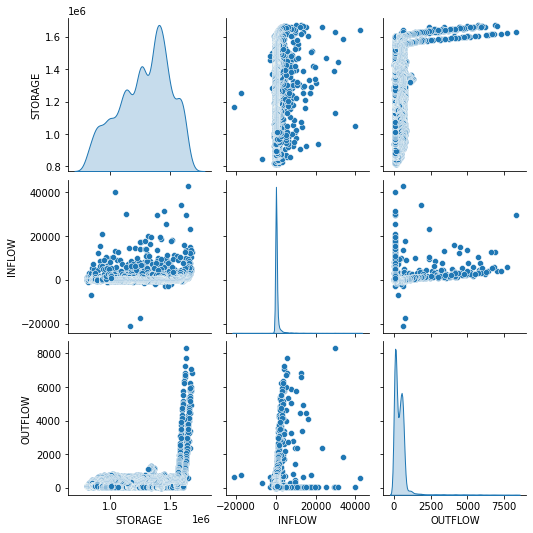

In [37]:
_ = sns.pairplot(df, diag_kind='kde')

In [38]:
df.describe()

,STORAGE,INFLOW,OUTFLOW
count,7.664000e+03,7664.000000,7664.000000
mean,1.286560e+06,451.876044,393.736039
std,2.081503e+05,1832.642306,555.676215
min,8.149870e+05,-21099.000000,0.000000
25%,1.132734e+06,-28.000000,90.000000
50%,1.315267e+06,87.500000,315.000000
75%,1.438667e+06,297.250000,541.000000
max,1.675491e+06,42576.000000,8293.000000


In [39]:
import plotly.figure_factory as ff
#disclaimer: the graph is generated in colab, but it does not show up in github

fig = ff.create_scatterplotmatrix(df, diag='histogram', index='',  opacity=.8)
fig.update_yaxes(showticklabels = False)
fig.update_xaxes(showticklabels = False)
fig.show()

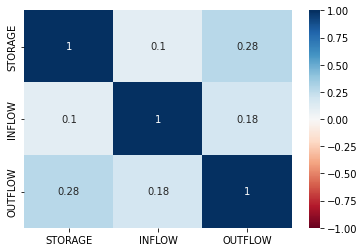

In [40]:
# Generate heatmap
data = df.copy().corr()
_ = sns.heatmap(data, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

In [41]:
dfcolumnnames = ['STORAGE','INFLOW','OUTFLOW']
df.describe
print(df.dtypes)
df2 = df.drop(columns=['DATE TIME'])
df2.dtypes

DATE TIME    object
STORAGE       int64
INFLOW        int64
OUTFLOW       int64
dtype: object


STORAGE    int64
INFLOW     int64
OUTFLOW    int64
dtype: object

In [42]:
df['DATE TIME']  = df['DATE TIME'].astype(str)
df['DATE TIME'] = df['DATE TIME'].str[2:8]
df['DATE TIME'] = df['DATE TIME'].astype(int)
# df['DATE TIME'] = df.index
df

,DATE TIME,STORAGE,INFLOW,OUTFLOW
0,10101,1363258,-151,95
1,10102,1363077,17,95
2,10103,1362897,12,83
3,10104,1362716,-3,75
4,10105,1362535,6,84
...,...,...,...,...
7665,211227,1004509,2591,62
7666,211228,1007020,1357,70
7667,211229,1011107,2124,64
7668,211230,1014256,1648,60


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2 = pd.DataFrame(scaler.fit_transform(df2), columns=dfcolumnnames)
df2.describe()

,STORAGE,INFLOW,OUTFLOW
count,7664.000000,7664.000000,7664.000000
mean,0.548020,0.338451,0.047478
std,0.241893,0.028781,0.067005
min,0.000000,0.000000,0.000000
25%,0.369257,0.330915,0.010853
50%,0.581380,0.332729,0.037984
75%,0.724785,0.336023,0.065236
max,1.000000,1.000000,1.000000


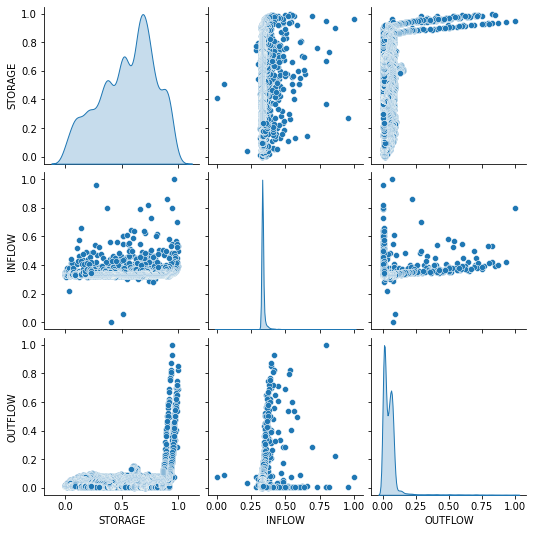

In [44]:
_ = sns.pairplot(df2, diag_kind='kde')

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2['OUTFLOW'], df2['STORAGE'], test_size=0.2, random_state = 21)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(np.asarray(X_train).reshape(-1, 1), np.asarray(y_train).reshape(-1, 1))

predicted = lr.predict(np.asarray(X_test).reshape(-1, 1))
print(f'Testing MSE error is: {round(mean_squared_error(predicted, np.asarray(y_test).reshape(-1, 1)), 4)}')

Testing MSE error is: 0.0539


In [47]:
from sklearn import preprocessing
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns

#ENCODE THE DATE
encoder = preprocessing.LabelEncoder()
ytemp = encoder.fit_transform(df["DATE TIME"])
#print(ytemp)

"""
#Generate data points to numpy so it can be treated as ar
x, y = ytemp, df['STORAGE'].to_numpy()
A = np.vstack([x, np.ones(len(x))]).T
beta = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)

#Graph the line with a scatterplot and line with a color that is readable
sns.scatterplot(data=df, x='DATE TIME', y='STORAGE', alpha=.5)
sns.lineplot(x=x, y=beta[0]*x+beta[1], color='purple', alpha=.5)

#Plot the graph so it will look nice.
reg = SGDRegressor()
reg.fit(X=np.asarray(X_test).reshape(-1, 1), y=y_test)
y_pred = reg.predict(X=np.asarray(X_test).reshape(-1, 1))

#Generate MSE
mse = mean_squared_error(y_test, y_pred)
print('Training MSE:', mse)
"""

"\n#Generate data points to numpy so it can be treated as ar\nx, y = ytemp, df['STORAGE'].to_numpy()\nA = np.vstack([x, np.ones(len(x))]).T\nbeta = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)\n\n#Graph the line with a scatterplot and line with a color that is readable\nsns.scatterplot(data=df, x='DATE TIME', y='STORAGE', alpha=.5)\nsns.lineplot(x=x, y=beta[0]*x+beta[1], color='purple', alpha=.5)\n\n#Plot the graph so it will look nice.\nreg = SGDRegressor()\nreg.fit(X=np.asarray(X_test).reshape(-1, 1), y=y_test)\ny_pred = reg.predict(X=np.asarray(X_test).reshape(-1, 1))\n\n#Generate MSE\nmse = mean_squared_error(y_test, y_pred)\nprint('Training MSE:', mse)\n"

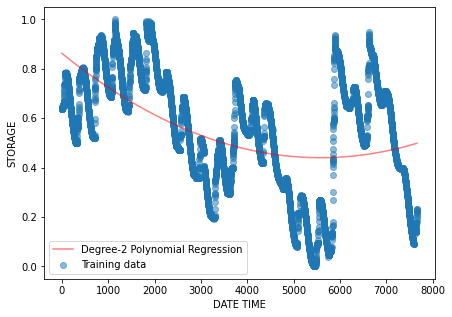

Training MSE: 0.043712772297014715
Testing MSE: 0.04490189166038626


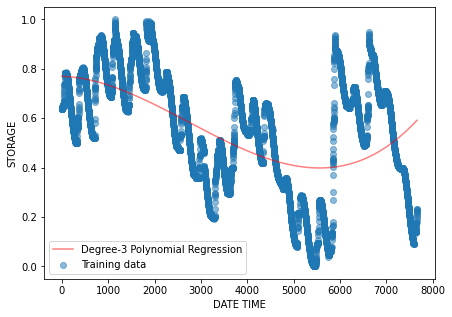

Training MSE: 0.04237976497682608
Testing MSE: 0.04406307064666278


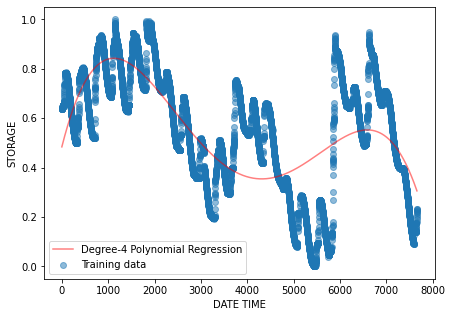

Training MSE: 0.0334121946650792
Testing MSE: 0.034499250843925564


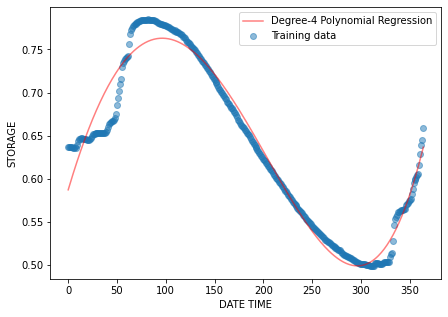

Training MSE: 0.00030475687608205623
Testing MSE: 0.00022735067032604665


In [48]:
from sklearn.linear_model import LinearRegression
from IPython.display import display
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn import preprocessing

def PolynomialRegression(X, y, deg=3):
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    # Add new features of higher degrees
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    # Linear regression on the new matrix X
    polyReg = LinearRegression().fit(X_poly, y.reshape(-1, 1)) 
    
    #Using Discussion 2 code so it matches in design
    
    plt.figure(figsize=(7, 5))
    # Scatter plot of data points
    plt.scatter(X, y, alpha=.5)
    # Estimated poly
    plt.plot(X, polyReg.predict(X_poly), color='r', alpha=.5)
    
    poly.transform(X.reshape(-1, 1))
    
    plt.xlabel("DATE TIME")
    plt.ylabel("STORAGE")
    plt.legend([f'Degree-{deg} Polynomial Regression', 'Training data'])
    plt.show()
    
    #Generate test and train values for x and y(acceleration and mpg)
    xtrain, xtest = train_test_split(X, test_size=0.2, random_state=21)
    ytrain, ytest = train_test_split(y, test_size=0.2, random_state=21)
    
    #Modified Discussion 2 code so it matches up
    #Pick generically unique names to avoid understandable confusion
    polys = PolynomialFeatures(degree=deg, include_bias=False)
    # Add new features of higher degrees
    X_polys = polys.fit_transform(np.asarray(xtrain).reshape(-1, 1))
    # Linear regression on the new matrix X
    polyReg = LinearRegression().fit(X_polys, np.asarray(ytrain).reshape(-1, 1)) 
    

    #Testing values
    X_poly2 = polys.fit_transform(np.asarray(xtest).reshape(-1, 1))
    # Linear regression on the new matrix X
    polyReg2 = LinearRegression().fit(X_poly2, np.asarray(ytest).reshape(-1, 1)) 
    
    #poly.transform(X.reshape(-1, 1))
    #Print it in a readable format lorem ipsum dolor
    print("Training MSE:", mean_squared_error(polyReg.predict(X_polys), ytrain))
    print("Testing MSE:", mean_squared_error(polyReg.predict(X_poly2), ytest))
    


#Pick an X, Pick an Y, SORT BY X :D
X = np.asarray(ytemp)
y = np.asarray(df2["STORAGE"])
smallX = np.asarray(ytemp[0:365])
smally = np.asarray(y[0:365])
PolynomialRegression(X, y, deg=2)
PolynomialRegression(X, y, deg=3)
PolynomialRegression(X, y, deg=4)

#YEARLY FOR 2001
PolynomialRegression(smallX, smally, deg=4)